# PROJECT      TITANIC SURVIVAL PREDICATION 
BY           HASNAIN MUAVIA

TASK 1   CODESOFT

# Loading Libaraies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings

# Ignore all warning messages
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:\\Users\\Dell\\Desktop\\Data Science\\titanic dataset.csv')

In [3]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
370,1262,0,2,"Giles, Mr. Edgar",male,21.0,1,0,28133,11.5000,NaN,S
108,1000,0,3,"Willer, Mr. Aaron (Abi Weller"")""",male,NaN,0,0,3410,8.7125,NaN,S
258,1150,1,2,"Bentham, Miss. Lilian W",female,19.0,0,0,28404,13.0000,NaN,S
304,1196,1,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
251,1143,0,3,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
print('Number OF Rows',data.shape[0])
print('Number OF Columns',data.shape[1])

Number OF Rows 418
Number OF Columns 12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# EXPLORATARY DATA ANALYSIS(EDA)

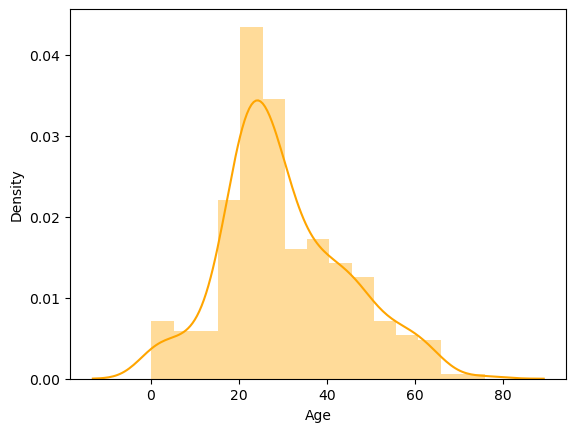

In [10]:
sns.distplot(data["Age"],color="orange")
plt.show()

# Handling Missing values

In [11]:
data=data.drop(columns="Cabin",axis=1)

In [12]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [13]:
data["Fare"].fillna(data["Age"].mean(),inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

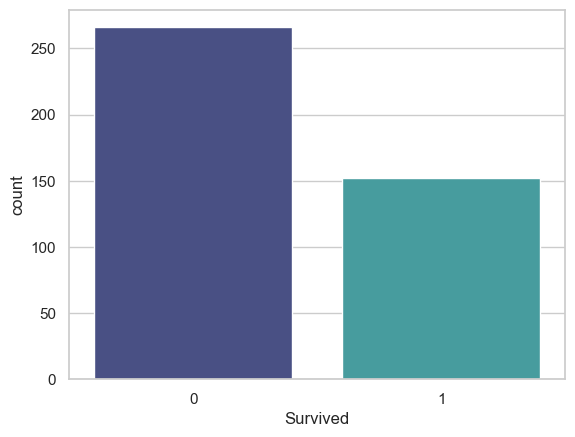

In [15]:
sns.set(style="whitegrid")
sns.countplot(data["Survived"],palette="mako")
plt.show()

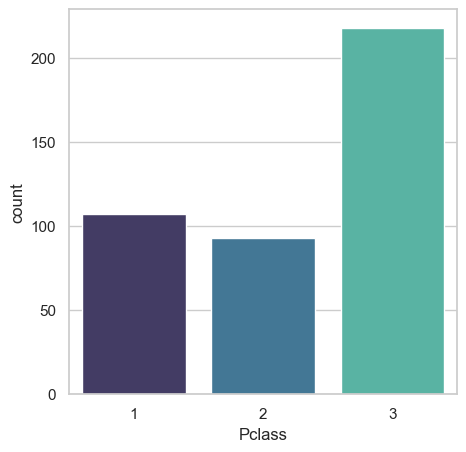

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(data["Pclass"],palette="mako")
plt.show()

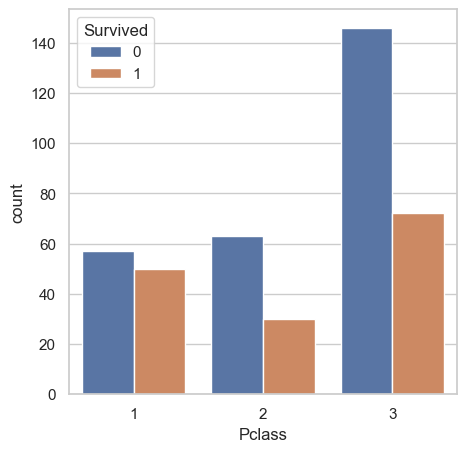

In [17]:
plt.figure(figsize=(5, 5))
sns.countplot(data["Pclass"],hue="Survived",data=data)
plt.show()

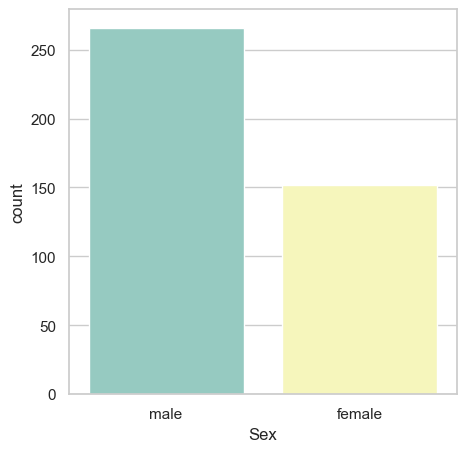

In [18]:
plt.figure(figsize=(5, 5))
sns.countplot(data["Sex"],palette="Set3")
plt.show()

In [19]:
data["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

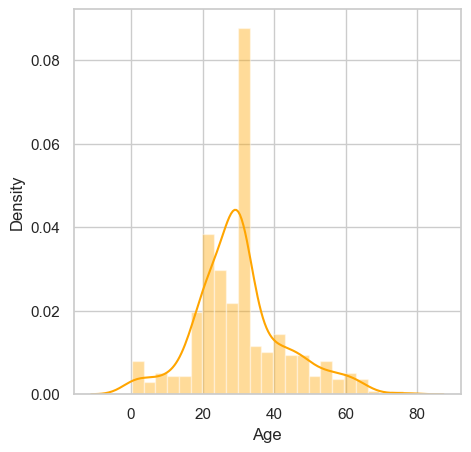

In [20]:
plt.figure(figsize=(5, 5))
sns.distplot(data["Age"],color="orange",kde=True)
plt.show()

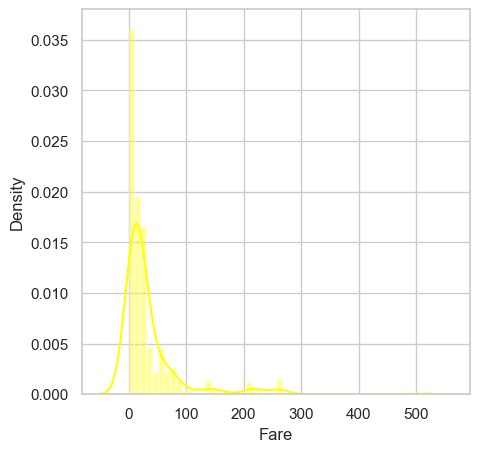

In [21]:
plt.figure(figsize=(5, 5))
sns.distplot(data["Fare"],color="yellow",kde=True)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Age'>

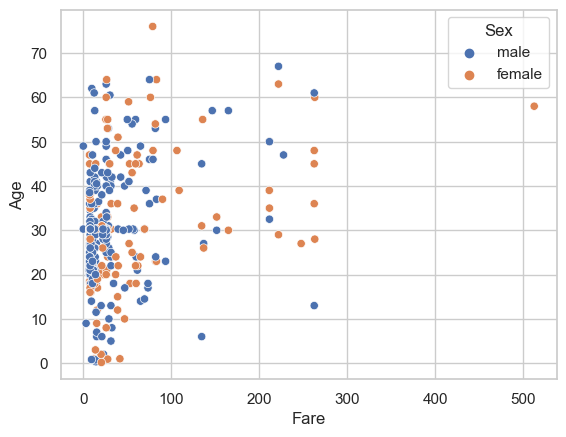

In [22]:
sns.scatterplot(x="Fare",y="Age",data=data,hue="Sex")

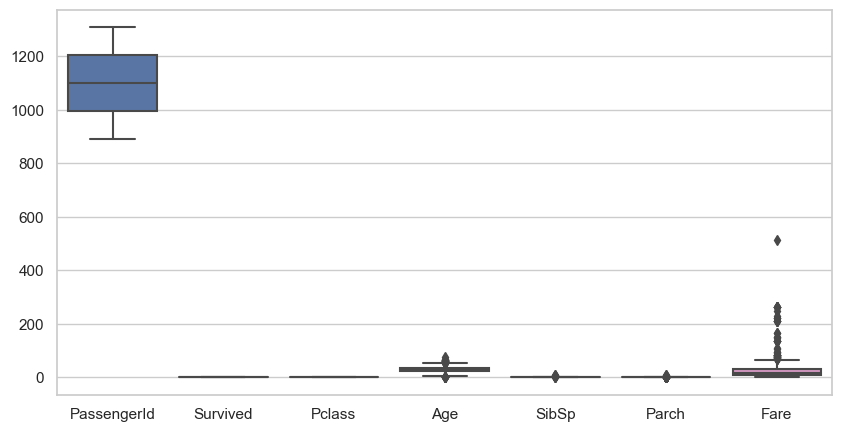

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.show()

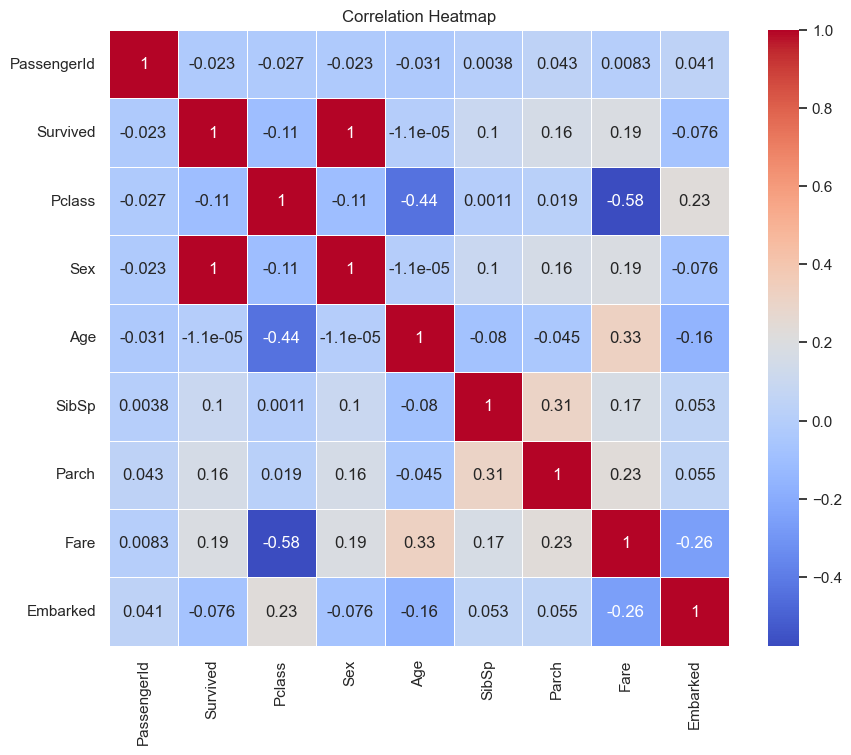

In [35]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1500x1000 with 0 Axes>

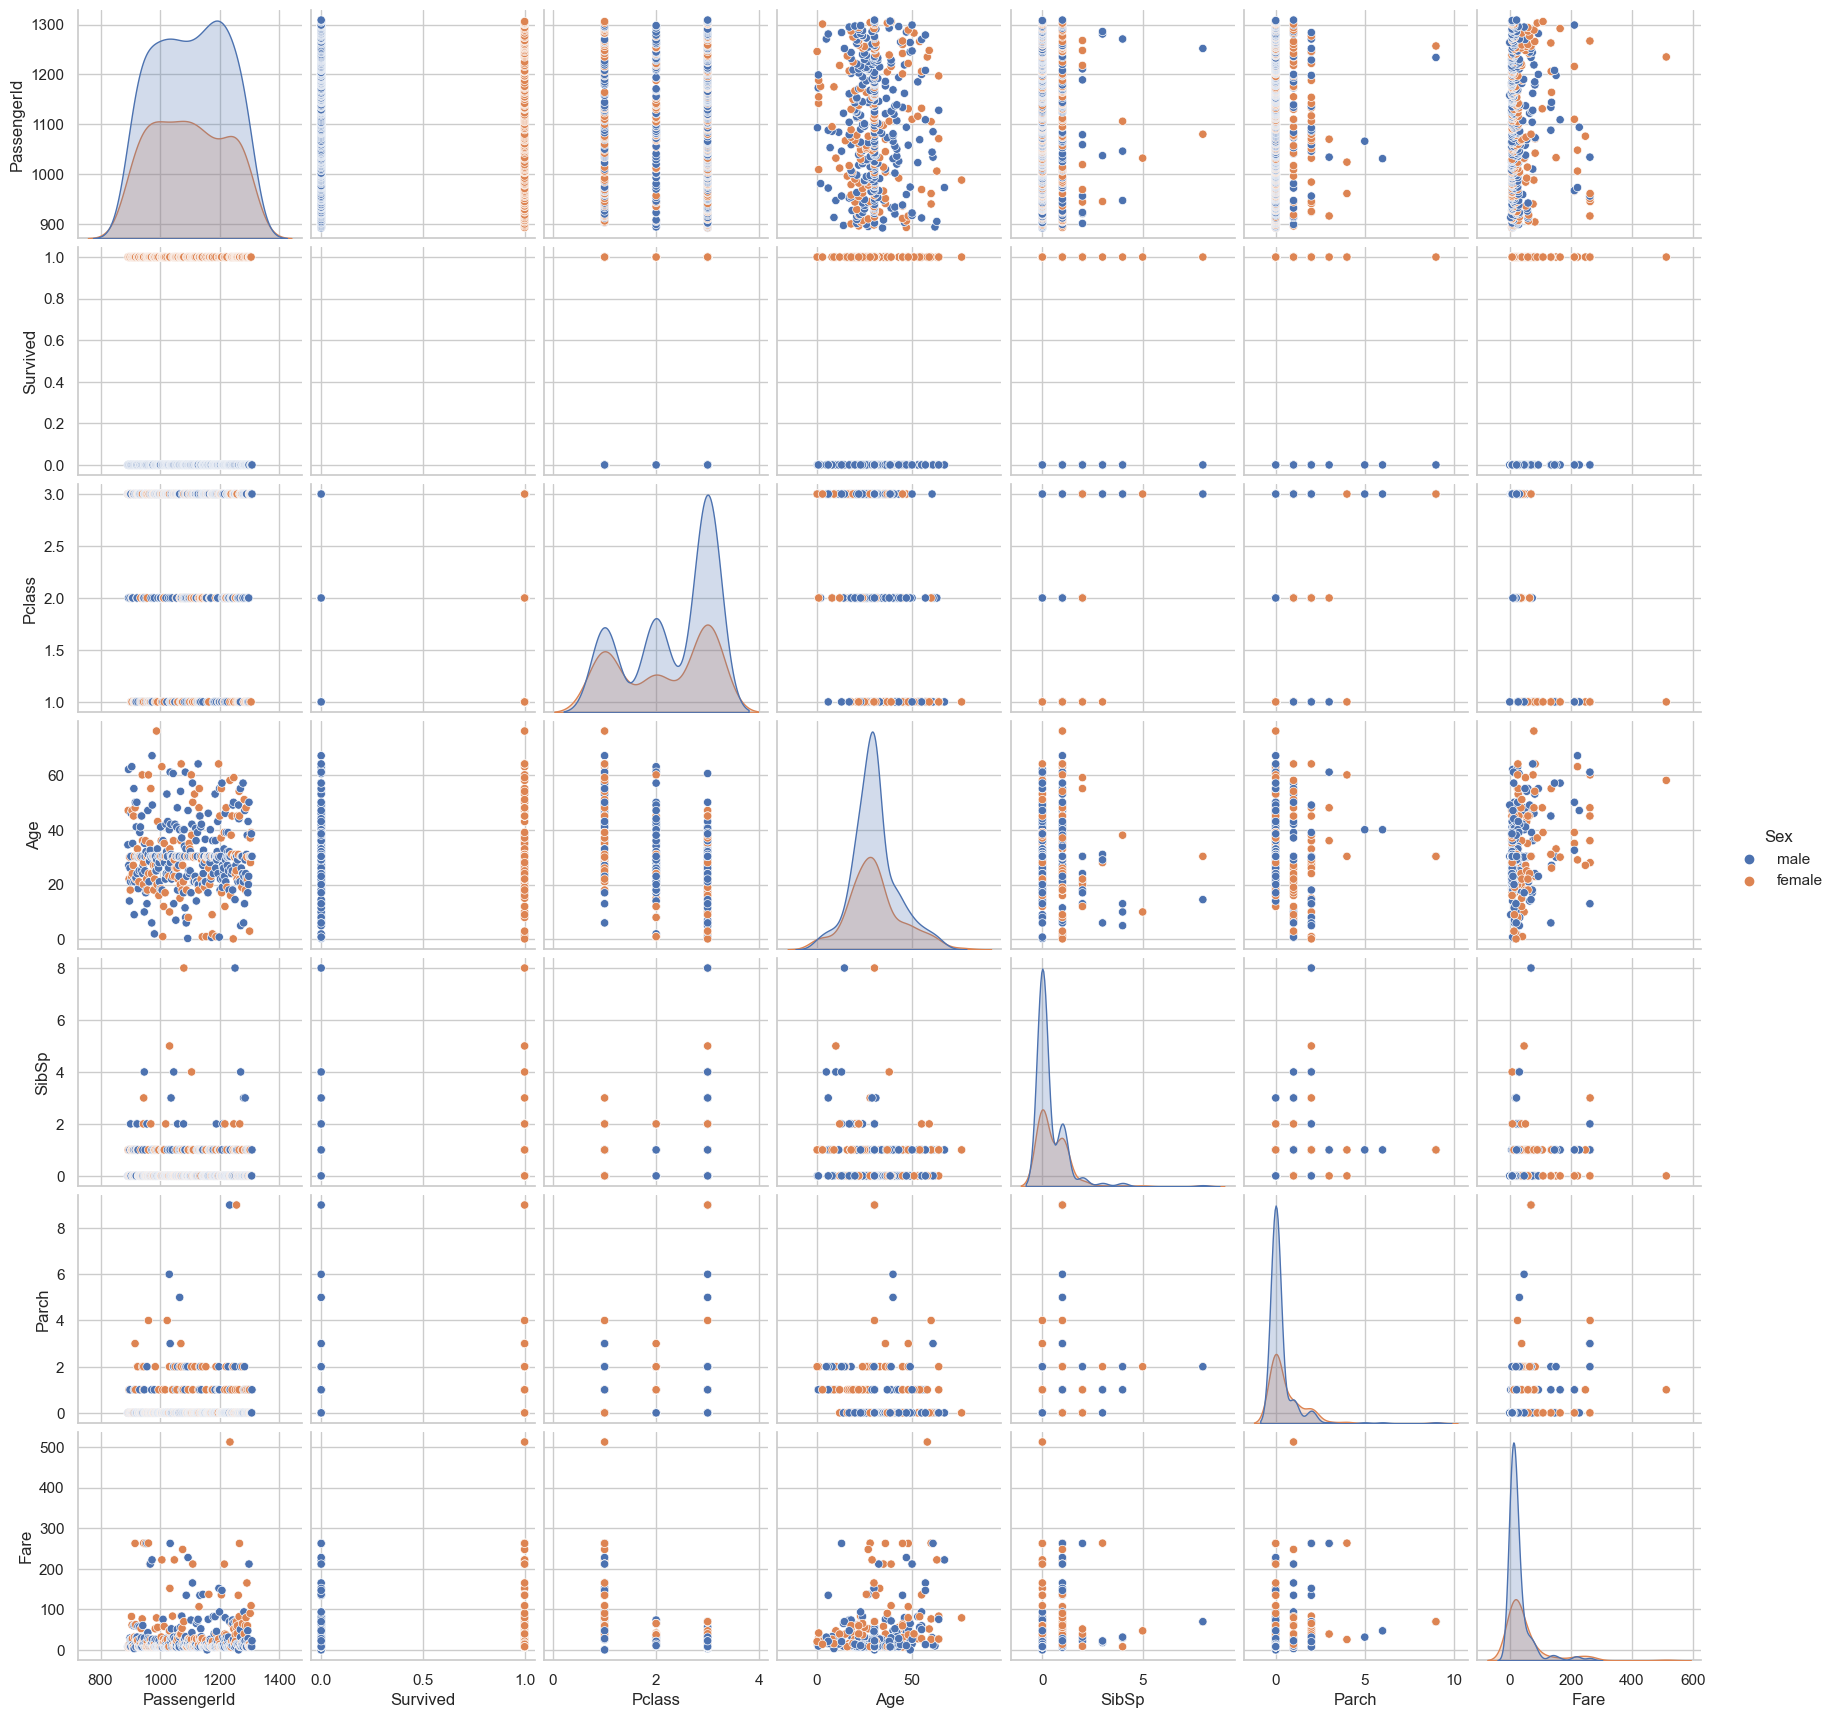

In [24]:
plt.figure(figsize=(15, 10))
sns.pairplot(data=data,hue="Sex")

# Data Encoding

In [25]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [26]:
data["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
data.replace({"Sex":{'male':0,'female':1}},inplace=True)

In [28]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
129,1021,0,3,"Petersen, Mr. Marius",0,24.00000,0,0,342441,8.0500,S
117,1009,1,3,"Sandstrom, Miss. Beatrice Irene",1,1.00000,1,1,PP 9549,16.7000,S
216,1108,1,3,"Mahon, Miss. Bridget Delia",1,30.27259,0,0,330924,7.8792,Q
70,962,1,3,"Mulvihill, Miss. Bertha E",1,24.00000,0,0,382653,7.7500,Q
293,1185,0,1,"Dodge, Dr. Washington",0,53.00000,1,1,33638,81.8583,S


In [29]:
data["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [31]:
encoder=LabelEncoder()

In [33]:
data["Embarked"]=encoder.fit_transform(data["Embarked"])

In [34]:
data["Embarked"].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2


# Feature selection

In [38]:
x=data.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
y=data["Survived"]

In [39]:
print(x)
print(y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         1
1         3    1  47.00000      1      0    7.0000         2
2         2    0  62.00000      0      0    9.6875         1
3         3    0  27.00000      0      0    8.6625         2
4         3    1  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         2
414       1    1  39.00000      0      0  108.9000         0
415       3    0  38.50000      0      0    7.2500         2
416       3    0  30.27259      0      0    8.0500         2
417       3    0  30.27259      1      1   22.3583         0

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# Spiltting the Data into Traning and testing

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


# Model selection and Fitting

In [42]:
model=LogisticRegression()

In [43]:
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
model.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
model.score(x_train,y_train)*100

100.0

In [47]:
model.score(x_test,y_test)*100

100.0